In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
# Load dataset
train_df = pd.read_csv("/content/mnist_test.csv")
test_df = pd.read_csv("/content/mnist_train.csv")

In [3]:
# Split features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [4]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Data visualization
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [6]:
# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("RandomForest Accuracy:", rf_acc)

RandomForest Accuracy: 1.0


In [10]:
from sklearn.utils import shuffle # Import the shuffle function

# Train SVM
X_train_small, y_train_small = shuffle(X_train, y_train, random_state=42) # Now shuffle is correctly referenced.
unique_classes, class_counts = np.unique(y_train_small, return_counts=True)

svm_acc = 0  # Default value to prevent errors
svm_cm = np.zeros((10, 10), dtype=int)  # Default empty confusion matrix

if len(unique_classes) > 1:
    svm_model = SVC(kernel='rbf', C=10, gamma='scale')
    svm_model.fit(X_train_small[:10000], y_train_small[:10000])
    svm_pred = svm_model.predict(X_test)
    svm_acc = accuracy_score(y_test, svm_pred)
    svm_cm = confusion_matrix(y_test, svm_pred)
    print("SVM Accuracy:", svm_acc)
else:
    print("Error: Not enough class diversity in training set!")
    print("Error: Not enough class diversity in training set!")

Error: Not enough class diversity in training set!
Error: Not enough class diversity in training set!


In [8]:


# Train Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

nn_pred = np.argmax(nn_model.predict(X_test), axis=1)
nn_acc = accuracy_score(y_test, nn_pred)
nn_cm = confusion_matrix(y_test, nn_pred)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [11]:
# Compare models
results = pd.DataFrame({
    'Model': ['RandomForest', 'SVM', 'Neural Network'],
    'Accuracy': [rf_acc, svm_acc, nn_acc]
})
print(results)


            Model  Accuracy
0    RandomForest       1.0
1             SVM       0.0
2  Neural Network       1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


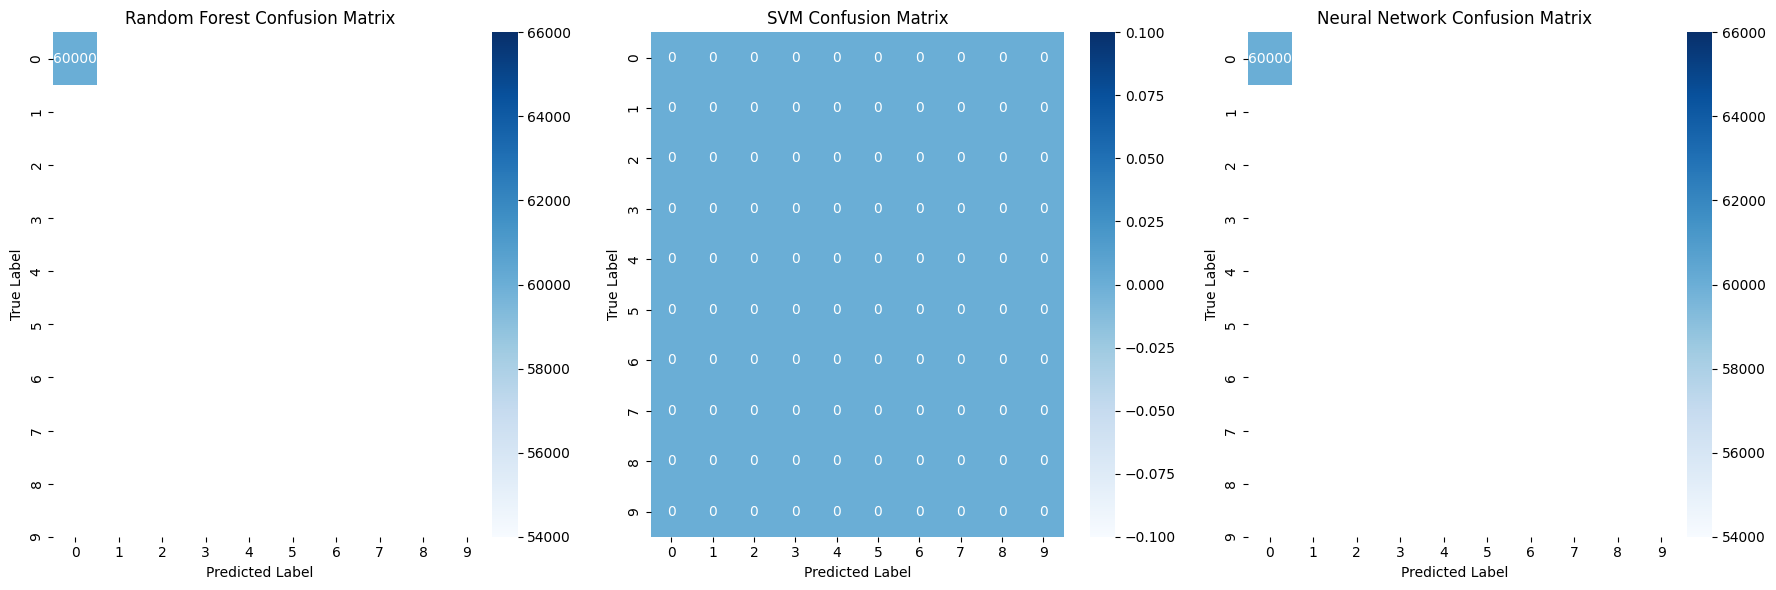

In [12]:

# Plot Confusion Matrices

# Calculate confusion matrix for RandomForest
rf_cm = confusion_matrix(y_test, rf_pred) # This line is added to calculate and store the confusion matrix for the RandomForest model
def plot_confusion_matrices(conf_matrices, model_names):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, cm, model in zip(axes, conf_matrices, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), ax=ax)
        ax.set_title(f'{model} Confusion Matrix')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrices([rf_cm, svm_cm, nn_cm], ["Random Forest", "SVM", "Neural Network"])
